Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [24]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 2.1

## Question 1.

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2) which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et. al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.


https://docs.google.com/document/d/1-XpR6YvMwnb2LZYjfZgmkGQbdvFeNCbhjYi0wqjuJDY/edit
    

## Question 2.
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python list). Give your answer in prose in the cell below.

I think that we can do two functions: one that breaks the lists down into smaller components and another one that merges them together while comparing them and chossing a smalle number to put in the beginning of the sorted list.

## Question 3.

Write a Python implementation of the merge pseudocode (both parts), your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A 

In [16]:
def merge(A, p, q, r):
    n1 = q - p + 1
    n2 = r - q
    L = []
    R = []
    for i in range (0,n1):
        L.append(A[p+i])
    for j in range(0,n2):
        R.append(A[q+j+1])
    L.append(max(A)+1)
    R.append(max(A)+1)
    i = 0
    j = 0
    for k in range(p,r+1): 
        if L[i] <= R[j]:
            A[k] = L[i]
            i = i+1
        else:
            A[k] = R[j]
            j = j+1
    return A

list1 = [2,6,7,8,1,4,6,9]
merge(list1, 0, 2, 5)

[2, 6, 7, 8, 1, 4, 6, 9]

In [17]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2
Suppose that your Python implementation of the merge algorithm is already working. Inspect the code for merge sort below:

In [18]:
def merge_sort(A,p,r):
    if p < r:
        q = (p+r)/2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A)

Copy and paste the code above to the cell below and fix the bug in it. 

In [19]:
def merge_sort(A,p,r):
    if p < r:
        q = (p+r)//2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A)

merge_sort(list1, 0, len(list1)-1)

[1, 2, 4, 6, 6, 7, 8, 9]

Instead of q = (p+r)/2 we use q = (p+(r-1))/2

In [20]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

# Question 5.
As in the previous Lesson, count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. 


In [21]:
def merge1(A, p, q, r):
    step_count = 0
    n1 = q - p + 1
    step_count += 1
    n2 = r - q
    step_count += 1
    L = []
    step_count += 1
    R = []
    step_count += 1
    for i in range (0,n1):
        L.append(A[p+i])
        step_count += 1
    for j in range(0,n2):
        R.append(A[q+j+1])
        step_count += 1
    L.append(max(A)+1)
    step_count += 1
    R.append(max(A)+1)
    step_count += 1
    i = 0
    step_count += 1
    j = 0
    step_count += 1
    for k in range(p,r+1): 
        if L[i] <= R[j]:
            A[k] = L[i]
            step_count += 1
            i = i+1
            step_count += 1
        else:
            A[k] = R[j]
            step_count += 1
            j = j+1
            step_count += 1
    return step_count

merge1(list1, 0, 3, 7)

32

In [22]:
def merge_sort1(A,p,r):
    step_count = merge1(A, 0, int((p+r/2)-1), r-1)
    if p < r:
        q = int((p+(r-1))/2)
        step_count += 1
        merge_sort(A,p,q)
        step_count += 1
        merge_sort(A,q+1,r)
        step_count += 1
        merge(A,p,q,r)
        step_count += 1
    return(step_count)


merge_sort1(list1, 0, len(list1)-1)

33

In [23]:
for k in range(1,16):
    list_k = []
    for i in range(100*k, 0, -1):
        list_k.append(i)
    print("for the list i for i in range(100*k, 0, -1), where k is ", k, "the number of steps is ", merge_sort1(list_k, 0, int(len(list_k) - 1)))

    


for the list i for i in range(100*k, 0, -1), where k is  1 the number of steps is  309
for the list i for i in range(100*k, 0, -1), where k is  2 the number of steps is  609
for the list i for i in range(100*k, 0, -1), where k is  3 the number of steps is  909
for the list i for i in range(100*k, 0, -1), where k is  4 the number of steps is  1209
for the list i for i in range(100*k, 0, -1), where k is  5 the number of steps is  1509
for the list i for i in range(100*k, 0, -1), where k is  6 the number of steps is  1809
for the list i for i in range(100*k, 0, -1), where k is  7 the number of steps is  2109
for the list i for i in range(100*k, 0, -1), where k is  8 the number of steps is  2409
for the list i for i in range(100*k, 0, -1), where k is  9 the number of steps is  2709
for the list i for i in range(100*k, 0, -1), where k is  10 the number of steps is  3009
for the list i for i in range(100*k, 0, -1), where k is  11 the number of steps is  3309
for the list i for i in range(100

# Question 6. 
Use the code you wrote for Lesson 1.2 (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Using as many cells as you wish (code cells or markdown cells alike) to complete this question.


In [4]:
list_control = []
for k in range(1,5):
    for i in range(100*k, 0, -1):
        list_control.append(i)

In [41]:
import time
def insertionSort(A):
    count = 0
    for j in range(len(A)):
        count += 1
        key = A[j]
        count += 1
        i= j-1
        count += 1
        while i >= 0 and A[i]>key:
            A[i+1] = A[i]
            count += 1
            i -= 1
            count += 1
        A[i+1] = key
        count += 1
    return count

y1 = []
t1 = []

for k in range(1,4):
    list_k = []
    for i in range(10*k, 0, -1):
        list_k.append(i)
    a = time.time()
    y1.append(insertionSort(list_k))
    b = time.time()
    t1.append(b-a)
    


In [42]:
def bubbleSort(A):
    count = 0
    for i in range(len(A)-1):
        for j in range(len(A)-1-i):
            if A[j] > A[j+1]:
                l = A[j+1]
                count += 1
                A[j+1] = A[j]
                count += 1
                A[j] = l
                count += 1
    return count

y2 = []
t2 = []
for k in range(1,4):
    list_k = []
    for i in range(10*k, 0, -1):
        list_k.append(i)
    a = time.time()
    y2.append(bubbleSort(list_k))
    b = time.time()
    t2.append(b-a)

In [43]:
def selectionSort(A):
    count=0
    n = len(A)
    count += 1
    for i in range(0,n-1):
        for j in range (i+1, n):
            if A[j] < A[i]:
                A[j], A[i] = A[i], A[j]
                count += 1
    return count

y3 = []
t3 = []

for k in range(1,4):
    list_k = []
    for i in range(10*k, 0, -1):
        list_k.append(i)
    a = time.time()
    y3.append(selectionSort(list_k))
    b = time.time()
    t3.append(b-a)

In [44]:
y4 = []
t4 = []
for k in range(1,4):
    list_k = []
    for i in range(10*k, 0, -1):
        list_k.append(i)
    a = time.time()
    y4.append(merge_sort1(list_k, 0, int(len(list_k) - 1)))
    b = time.time()
    t4.append(b-a)
print(y4)

[39, 69, 99]


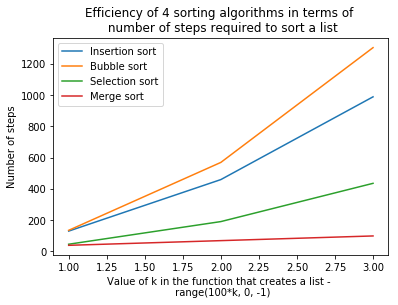

In [45]:
import matplotlib.pyplot as plt
x = list(range(1,4))

plt.plot(x,y1,label = "Insertion sort")
plt.plot(x,y2,label = "Bubble sort")
plt.plot(x,y3,label = "Selection sort")
plt.plot(x,y4,label = "Merge sort")
plt.title("Efficiency of 4 sorting algorithms in terms of \n number of steps required to sort a list")
plt.ylabel("Number of steps")
plt.xlabel("Value of k in the function that creates a list - \n range(100*k, 0, -1)")
plt.legend(loc="upper left")


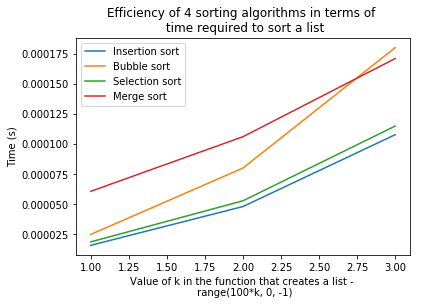

In [46]:
import matplotlib.pyplot as plt
x = list(range(1,4))

plt.plot(x,t1,label = "Insertion sort")
plt.plot(x,t2,label = "Bubble sort")
plt.plot(x,t3,label = "Selection sort")
plt.plot(x,t4,label = "Merge sort")
plt.title("Efficiency of 4 sorting algorithms in terms of \n time required to sort a list")
plt.ylabel("Time (s)")
plt.xlabel("Value of k in the function that creates a list - \n range(100*k, 0, -1)")
plt.legend(loc="upper left")